<a href="https://colab.research.google.com/github/jordiparis165/Build-Your-Own-Git-Challenge---Jordi-Paris/blob/main/Copie_de_TDNot%C3%A9__Fraud_Detection_Incremental_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Fraud Detection – Incremental Machine Learning Strategies

⚠️ **Important**: This practical work is **graded**.

The objective of this notebook is to study a **highly imbalanced binary classification problem**
and to progressively improve the performance of fraud detection models.

Rather than applying advanced techniques directly, you are asked to follow an **incremental learning strategy**:

1. Start with a **naïve baseline classifier**
2. Introduce **cost-sensitive learning**
3. Adapt **evaluation metrics**
4. Integrate **Ensemble Learning**
5. Integrate **data-level imbalance solutions**
6. Explore **more expressive models**

At each step, you must **interpret the results**, justify the methodological choices, and discuss their limitations.


#Credit Card Fraud Detection: Context
Credit card transactions have become a cornerstone of modern society, facilitating financial exchanges across the globe. However, with the exponential growth of online payments and electronic transactions, opportunities for fraud in this domain have also multiplied. Ensuring the security of credit card transactions has therefore become a major concern for both consumers and credit card issuers.

The importance of detecting fraudulent credit card transactions cannot be overstated. Nobody wants to be the victim of credit card fraud, where unauthorized purchases are made in their name. Consequently, it is imperative that credit card companies are able to quickly recognize and identify fraudulent transactions.

In this project, we will explore machine learning methods and algorithms used for detecting fraud in credit card transactions. By applying supervised learning techniques, we aim to identify subtle patterns that may indicate fraudulent activity.


# I - Data -processing

## I.1 - Import the libraries.

In [ ]:
import numpy as np
import pandas as pd
import csv
import time
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score, recall_score,precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## I.2 - Uploading Data

**Database Description**

The dataset contains credit card transactions carried out by European cardholders in September 2013.

It includes transactions recorded over a two-day period, with a total of 492 fraud cases out of 284,807 transactions. The dataset is highly imbalanced, as the positive class (fraud) accounts for only 0.172% of all transactions.

The features of the transactions are represented by variables V1 through V28, along with the “Amount” and “Time” variables. The target variable “Class” serves as the response variable, taking the value 1 in the case of fraud and 0 otherwise. For security reasons, the original names of the variables have not been disclosed.

Before applying classification methods, it is necessary to first analyze the dataset.


In [ ]:
#céer une connection avec google colab
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Data/creditcard.csv",sep=',', header = 0)

#Display the data dimentionality


#Display data types


## I.3 - Exploration of Relationships and Features

The database contains 284,807 observations and 31 variables.

1. Display the descriptive statistics of the dataset.

2. Check if there are some missing values

3. Display the boxplots of all variables. Are ther any outliers?

4. Display the correlation matrix of the variables. Are there any variables that are strongly correlated?

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
#plotting boxplots

In [ ]:
# Correlation
# print the correlation coefficients between each variable and the 'Class' variable, sorted in descending order
corr_mat=data.corr()
res=corr_mat["Class"].sort_values(ascending=False)
print(res)

## I.4 - Data scaling

To achieve better classification performance, it is necessary to reduce the undesirable effects of outliers by scaling the data to a standard range.

In [ ]:
#Data standarization


In [ ]:
# verification
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,nTime,nAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-1.996583,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-1.996583,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-1.996562,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-1.996562,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-1.996541,-0.073403


## I.5 - Splitting the data into input (X) and output (Y)

In [ ]:
#Splitting the data into input (X) and output (Y)
X = data.drop(columns=["Class"]).values
Y = data["Class"].values

print(X.shape, Y.shape)

(284807, 30) (284807,)



###  Display the degree of imbalance in the data

1. Quantify imbalance → calculate the proportion of majority (non-fraud) and minority (fraud) classes.

2. Visualize imbalance → graph the distribution of classes to highlight the imbalance.

3. What do you observe? Propose a solution for this imbalance problem

Number of negative observations: 284315 (99.83% of total)
Number of positive observations: 492 (0.17% of total)


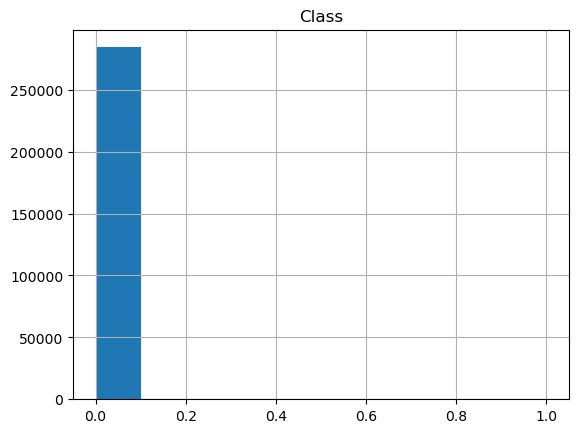

In [ ]:
#use data.hist to plot the two classes



## I.6 - Split train/test data

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state=0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(199364, 30) (85443, 30) (199364,) (85443,)


#II- Classification without Balancing using Cost-Sensitive Learning

A **First Model: Cost-Sensitive Learning with class_weight** :
For this model, you'll train a SVM on the original, imbalanced dataset. The key is to use the class_weight parameter to penalize misclassifications of the minority class. This technique modifies the learning algorithm's cost function without altering the data itself.

Evaluate the model by plotting the confusion matrix and the classification Report


#III- Classification using Ensemble Learning with Cost-Sensitive Learning

**Objective**: Explore boosting algorithms and how they can help in handling highly imbalanced datasets.

Boosting algorithms (e.g., AdaBoost, Gradient Boosting, XGBoost) iteratively focus on misclassified samples, which often include minority class instances. This makes them naturally more sensitive to class imbalance.

1. Explain the principle of Boosting: Each model corrects the errors of the previous one. Misclassified samples (often minority class) get more weight.

2. Train two boosting models:

##  **AdaBoostClassifier**
Class sklearn.ensemble.AdaBoostClassifier(estimator=None, *, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None, base_estimator='deprecated')

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.


## Cost-Sensitive Gradient Boosting with XGBoost

In this section, we replace the classical Gradient Boosting model from `scikit-learn`
with **XGBoost**, a high-performance gradient boosting library widely used in industry.

⚠️ **Important clarification**  
XGBoost is **not part of scikit-learn**, but it provides a *scikit-learn compatible API*
(`fit`, `predict`, `predict_proba`). This allows us to integrate it seamlessly into
our machine learning workflow.

### Why XGBoost in this context?

Unlike `GradientBoostingClassifier` from `scikit-learn`, XGBoost allows **native cost-sensitive learning**
through a dedicated parameter: `scale_pos_weight`.

This is particularly important in fraud detection, where:
- the minority class (fraud) is extremely rare
- misclassifying a fraud (false negative) is much more costly than a false alarm

---

### Model definition

```python
from xgboost import XGBClassifier

# ratio between majority and minority classes
ratio = (y_train == 0).sum() / (y_train == 1).sum()

xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=1.0,
    colsample_bytree=1.0,
    objective="binary:logistic",
    scale_pos_weight=ratio,
    eval_metric="logloss",
    random_state=42
)
```

### Explanation of key parameters

- `n_estimators`: number of boosted trees
- `learning_rate`: contribution of each tree
- `max_depth`: complexity of individual trees
- `scale_pos_weight`: increases the penalty for misclassifying fraud cases  
  → **this is the core cost-sensitive parameter**
- `objective="binary:logistic"`: required for binary classification
- `eval_metric`: metric optimized during training

---

### Training the model

```python
xgb_model.fit(X_train, y_train)
```

XGBoost internally adjusts the learning process to focus more on the minority class, without modifying the data distribution.


3. **Use Cost-Sensitive Learning:**

* Adjust class weights or use scale_pos_weight to penalize misclassification of the minority class.

##**Comparing**:
Evaluate the models by plotting the confusion matrix and the classification Reports. Choose one or two models for the next steps.

# IV-  Classification with balanced data

To avoid any overfitting or underfitting effects, it is imperative to achieve an optimal balance in data handling. In the next section, we will undertake classification using balanced data, employing two specific balancing techniques:

**SMOTE** : A data balancing technique that involves generating synthetic examples for the minority class by creating artificial observations similar to existing samples, in order to balance the class distribution.

**B-SMOTE**: A variant of SMOTE that specifically focuses on examples from the minority class located near the decision boundary, generating synthetic data to strengthen these crucial areas for classification.

1. Make a copy of the training data `x_train1`
2. Create a new balanced training data with  SMOTE (`x_train2`)
3. Create an other balanced training date with B-SMOTE (`x_train3`)


## IV-1  Classification with Random Forest


To create the Random Forest classification models as you've outlined, you'll need to follow a structured approach. Here is a plan to implement each of the three models.


2. **Second Model: SMOTE Balanced Data**
The second model will use a dataset that has been balanced using the SMOTE (`x_train2`)
3. **Third Model: B-SMOTE Balanced Data**
The third model is similar to the second, but it uses the Borderline-SMOTE (B-SMOTE) (`x_train3`)

3. Build two pipelines:

*   One using the best configuration of Random Forest from the previous section with SMMOTE.
*   One using the Random Forest with SMOTE.

Use ImbPipeline for pipelines (from imblearn.pipeline) that include resampling techniques

## IV- 2- Classification with a Boosting technique
Similarly, in this section you will create three classification models using a boosting technique as follows:


1.  **First Model:  SMOTE Balanced Data** will use a dataset  balanced with SMOTE (`x_train2`)
3.  **Third Model: B-SMOTE Balanced Data** will use a dataset  balanced with B-SMOTE (`x_train3`)



In [ ]:
from imblearn.over_sampling import SMOTE, BorderlineSMOTE

# create a first copy of x_train
# Create a balanced set x_train2 using SMOTE
...

# Create an other balanced set x_train3 using Borderline SMOTE
...




#  Model comparison: which is the best model for the database?

Compare the different models according to recall, specificity, F1-score and AUC metrics.

#V- Active Learning Integration

In this section, we propose to combine Ensemble Learning, Balanced Learning and Active Learning paradigm for Fraud Detection.

Use **modAL** to actively select the most informative samples from the training pool.

**Steps**:

*   Start with a small labeled subset (e.g., 1% of training data)
*   Use uncertainty sampling to query new samples
*   Train a classifier
*   Track performance after each query round

In [ ]:
#Install modAL
!pip install modAL-python

In [ ]:
rom modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling
from sklearn.model_selection import train_test_split
import numpy as np
import warnings
warnings.filterwarnings(
    "ignore",
    category=FutureWarning,
    module='sklearn'
)

#VI- Anomaly Detection

In this final section, we briefly introduce **anomaly detection** as an alternative paradigm to supervised fraud detection.

Its purpose is to expose you to the idea that fraud can be detected **without labeled data**, by identifying transactions that significantly deviate from normal behavior.

#VI  Discussion